         t    x        y
0        0    0  0.00000
1        0    1  0.00125
2        0    2  0.00250
3        0    3  0.00375
4        0    4  0.00500
...    ...  ...      ...
20195  199   96  0.02000
20196  199   97  0.01500
20197  199   98  0.01000
20198  199   99  0.00500
20199  199  100  0.00000

[20200 rows x 3 columns]
tmax 199


<IPython.core.display.Javascript object>


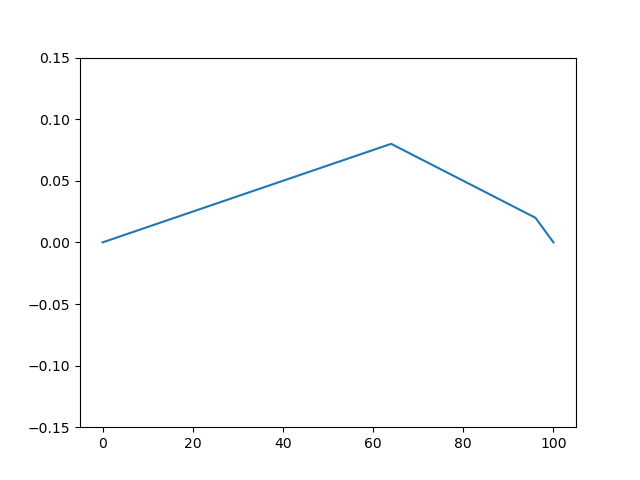

In [1]:
# This reads a csv file using pandas dataframe
# and copy data to numpy arrays to make a plot.
# animation from
# https://matplotlib.org/2.0.2/examples/animation/simple_anim.html
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation

# Enable interactive plot
%matplotlib notebook

df = pd.read_csv('wave1Dfull.csv')
print(df)

t=(df["t"].to_numpy())
x=(df["x"].to_numpy())
y=(df["y"].to_numpy())

tmax=np.amax(t)
print("tmax",tmax)

#  fetch data for time==0
tfilt= t==0      # filter for t==0 
xval=x[tfilt]
yval=y[tfilt]

fig = plt.figure()
ax = fig.add_subplot()

line=None

def animate(i):
    global line
    global xval,yval    # keep using same x-y grid

    it=i
    tfilt= t==it
    xval=x[tfilt]
    yval=y[tfilt]
    if line:
        ax.cla()    # clear previous image
    line=ax.plot(xval,yval)
    ax.set_ylim([-0.15,0.15])
    return line

def init():
    global line
    print("ini")
    if line:
        ax.cla()
    line=ax.plot(xval,yval)
    ax.set_ylim([-0.15,0.15])
    return line

ani=animation.FuncAnimation(fig,animate,np.arange(0,tmax),init_func=init,interval=200,blit=False)

# plt.savefig('plot_2dwave_t1.png')
plt.show()
